# First assignment

1_nn accuracy is 90.500000
4_nn accuracy is 92.500000
7_nn accuracy is 93.500000
10_nn accuracy is 93.500000
13_nn accuracy is 95.000000
16_nn accuracy is 93.500000
19_nn accuracy is 93.000000
22_nn accuracy is 92.500000


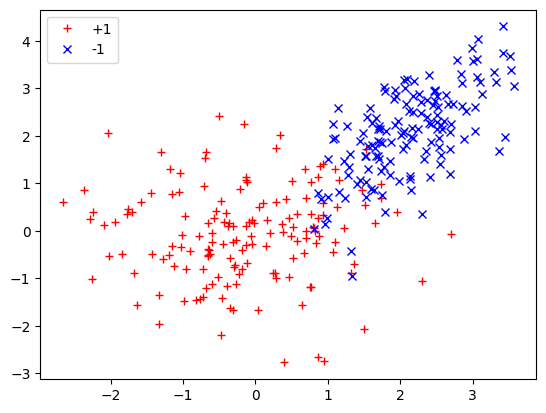

In [1]:
#assignment 42.48 try K-NN(K-nearest-neighbor) regression

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def genData(n=300, q=0.5, mu_1=[0, 0], cov_1=[[1, 0], [0, 1]], mu_2=[2, 2], cov_2=[[0.5, 0.5], [0.5, 1]]):
    y = (np.random.uniform(size=n) > 1-q) * 2 - 1
    n_1 = np.sum(y > 0)
    n_2 = n - n_1
    x = np.zeros((n, 2))
    x[y > 0, :] = np.random.multivariate_normal(mu_1, cov_1, n_1)
    x[y < 0, :] = np.random.multivariate_normal(mu_2, cov_2, n_2)
    return (x, y)


np.random.seed(0)
x_train,y_train=genData(n=300)
x_val,y_val=genData(n=200)


#plot trainning data
fig,ax=plt.subplots()
ax.plot(x_train[y_train>0,0],x_train[y_train>0,1],'r+')
ax.plot(x_train[y_train<0,0],x_train[y_train<0,1],'bx')
ax.legend(['+1','-1'])


for k in range(1,25,3):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    a=np.mean(clf.predict(x_val) == y_val) * 100
    print('%d_nn accuracy is %f' %(k,a))